# Analyzing DataSet w/Pandas

## Examining the dataset
Throughout this course, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset.

In [1]:
import pandas as pd

# Read 'police.csv' into a Dataframe
ri = pd.read_csv('datasets/police.csv')

# Eamine the head of DataFrame
display(ri.head())

# Count the number of missing values in each column
display(ri.isnull().sum())

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### Dropping Columns
* If not using columns that are useful to your analysis, such columns should be dropped
* Drop the `country_name` and `state` column as RI is the only state being used

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' column
ri.drop(labels=['county_name', 'state'], axis='columns', inplace=True)

# Rexamine the shape
print(ri.shape)

(91741, 15)
(91741, 13)


### Dropping Rows
* When you know that a specific column will be critical, and only a small fraction of rows are missing a value in that column, if often makes sense to remove those rows from the dataset
* `driving_gender` is critical but still missing some values so we'll drop the `rows'

In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


### Fixing a data type
* when possible changing to a categorical or bool type can help processing time and memory usage
* `is_arrested` as an object is likely one we can mutate 

In [4]:
ri['is_arrested'].value_counts()

False    83458
True      3078
Name: is_arrested, dtype: int64

In [5]:
# Examine the head of is_arrested
display(ri.is_arrested.head())
print(ri['is_arrested'].dtype)

# Change the datatype
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type 
print(ri['is_arrested'].dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

object
bool


### Creating a Datetime Index
* Currently the date and time of each traffic stop are stored in separate object columns `stop_date` and `stop_time`
* Combine these two columns into a single column, and then convert it to a date time format

In [6]:
ri[['stop_date', 'stop_time']].head(2)

,stop_date,stop_time
0,2005-01-04,12:55
1,2005-01-23,23:15


In [7]:
ri[['stop_date', 'stop_time']].dtypes

stop_date    object
stop_time    object
dtype: object

In [8]:
# Concatenate the two (separate by a space) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html
combined = ri.stop_date.str.cat(ri['stop_time'], sep=' ')
display(combined.head(2))

# convert 'combined' series to a datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of new column
print(ri['stop_datetime'].dtype, combined.dtype)

0    2005-01-04 12:55
1    2005-01-23 23:15
Name: stop_date, dtype: object

datetime64[ns] object


#### Setting the Index
* After concatenating the str type columns into a new series, we can set the existing dataframe with this new datetimeindex

In [9]:
# Set 'stop_datetime' as the index (can use new column added above)
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index, len(ri.index.unique()))

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None) 84429


<br>

## Exploring Relationship Between Gender & Policing
* Does the gender of a driver have an impact on police behavior during a traffic stop? In this chapter, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

In [10]:
# Before comparing the violations being committed by each gender, 
# you should examine the violations committed by all drivers to get a baseline understanding of the data.

# Count the unique values in 'violation'
print(ri['violation'].value_counts())

print('\n')

# Express the counts as proportions
print(ri['violation'].value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


#### Comparing Violations By Gender

In [11]:
# ri.columns, ri.driver_gender.unique() ## driver_gender is the column and 'M' and 'F' are unique values for col

# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F'] # return type DataFrame

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# compute the violations by female drivers (as proportions)
print(female['violation'].value_counts(normalize=True))

print('\n')

# compute the violations by male drivers (as proportions)
print(male['violation'].value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


* About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

#### Comparing speeding outcomes by gender
* When a driver is pulled over for speeding, many people believe taht ender has an impact on whether the driver will receive a ticket or a warning. 
* The `stop_outcome` column will be of interest here for our subsequent analysis

In [12]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male driver stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
display(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
display(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

#### Calculating the Search Rate
* Calculate the percentage of all stops that result in a vehilce search, also know as the "search rate"

In [13]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype, '\n')

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(),'\n', ri['search_conducted'].value_counts(normalize=True), '\n')

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool 

False    83229
True      3307
Name: search_conducted, dtype: int64 
 False    0.961785
True     0.038215
Name: search_conducted, dtype: float64 

0.0382153092354627


In [14]:
# Calculate the search rate for female drivers
display(ri[ri['driver_gender'] == 'F'].search_conducted.value_counts(normalize=True))

# Calculate the search rate for female drivers
print(ri[ri['driver_gender'] == 'F'].search_conducted.mean())

# Calculate the search rate for female drivers
print(ri[ri['driver_gender'] == 'M'].search_conducted.mean(), '\n')

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender')['search_conducted'].mean())

False    0.980819
True     0.019181
Name: search_conducted, dtype: float64

0.019180617481282074
0.04542557598546892 

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


* Male drivers are searched more than twice as often as female drivers. Why might this be?

In [15]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation'])['search_conducted'].mean())

# Quick look at how the total counts for the boolean `search_conducted` column look
ri.groupby(['driver_gender', 'violation'])['search_conducted'].value_counts().unstack()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


search_conducted                   False  True
driver_gender violation                       
F             Equipment             2401   100
              Moving violation      3157   129
              Other                  678    29
              Registration/plates    998    58
              Seat belt              568    10
              Speeding             15516   130
M             Equipment             7818   602
              Moving violation     12142   796
              Other                 3531   171
              Registration/plates   2359   288
              Seat belt             2198    80
              Speeding             31863   914

In [16]:
# Reverse the ordering to group by violation before gender (same outlay or stats but different hierarchical indexing)
print(ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


* For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

#### Does gender affect who is frisked during a search?

In [17]:
# count the `search_type' values
print(ri.search_type.value_counts(dropna=False))

print('\n')
# Check if 'search_type' contains the string 'Protective Frisk' - new column "frisk" that is True for string or false otherwise
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
display(ri['frisk'].value_counts(dropna=False))

print('\n')
# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

False    86233
True       303
Name: frisk, dtype: int64



bool
303


#### Comparing frisk rates by gender

In [18]:
# Create a DataFrame of stops in which a search was conducted
print(ri.search_conducted.dtype)

searched = ri.loc[ri['search_conducted'] == True]

# Calcualte the overall frisk rate 
print(f"From the stops with a search conducted, the mean search rate was : {round(searched['frisk'].mean() * 100, 2)}%")

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())


bool
From the stops with a search conducted, the mean search rate was : 9.16%
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


* The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

<br>

### Does time of day affect arrest rate?

<br>

#### Calculating the hourly arrest rate

In [19]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

print('\n')

# Quick look at the value counts per hour
print(ri.groupby(ri.index.hour)['is_arrested'].value_counts().unstack().head(5))

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


is_arrested    False  True
stop_datetime             
0               4574   248
1               3773   262
2               2518   163
3                993    64
4                238    12


#### Plotting Hourly Arrest Rate

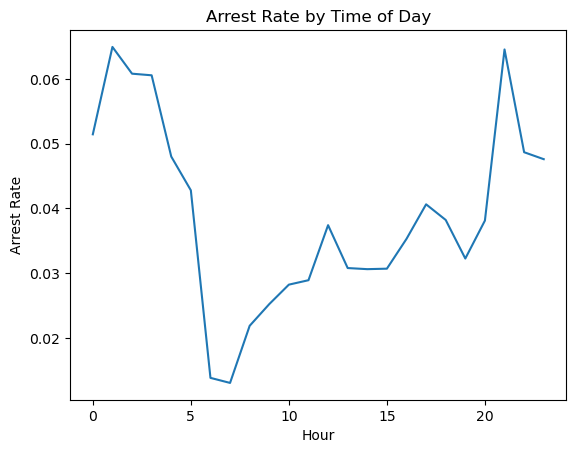

In [20]:
# In this exercise, you'll create a line plot from the hourly_arrest_rate object. 
# A line plot is appropriate in this case because you're showing how a quantity changes over time.

import matplotlib.pyplot as plt

# Create a line plot of hourly_arrest_rate
hourly_arrest_rate.plot(kind='line')

# Add lables
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display plot
plt.show()

#### Plotting drug-related stops
* In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.
* Pandas `dataframe.resample() or series.resample()` function is primarily used for time series data.
    * A time series is a series of data points indexed (or listed or graphed) in time order. 
    * Most commonly, a time series is a sequence taken at successive equally spaced points in time. 
* It is a Convenience method for frequency conversion and resampling of time series.
* https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

In [21]:
# Calculate the annual rate of drug-related stops
ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


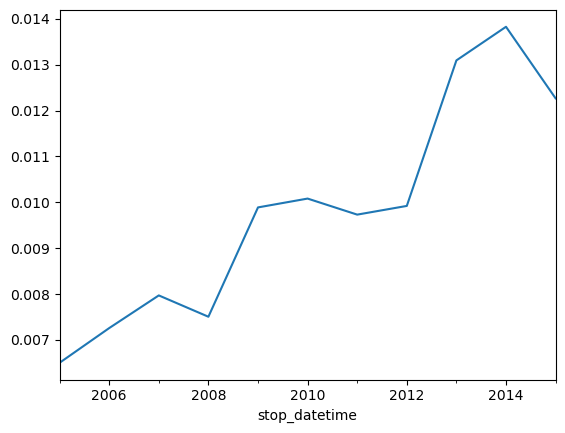

In [23]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(kind='line')

# Display the plot
plt.show()

* The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

<br>

#### Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

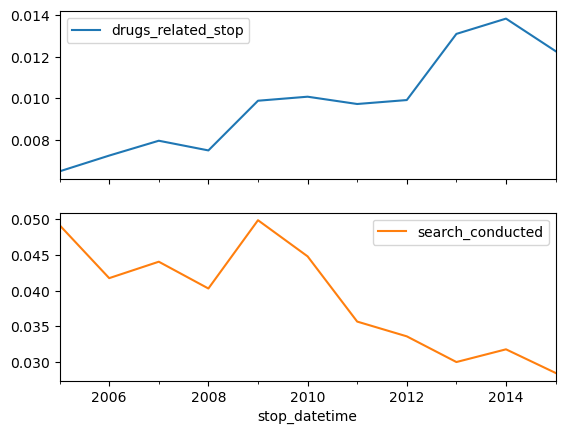

In [32]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()


# Concatenate 'annual_drug_rate' and 'annual_search_rate' (side by side - same length and shared timestamp resampled axis/index)
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# # Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

* The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

### Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as zones. 
* How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [43]:
# Create a frequency table of districts and violations
display(ri[['district', 'violation']].head(2))
display(pd.crosstab(ri['district'], ri['violation']))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# # Select rows 'Zone K1' through 'Zone K3'
display(all_zones.loc['Zone K1':'Zone K3', :])

# # Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3', :]

,district,violation
stop_datetime,,
2005-01-04 12:55:00,Zone X4,Equipment
2005-01-23 23:15:00,Zone K3,Speeding


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


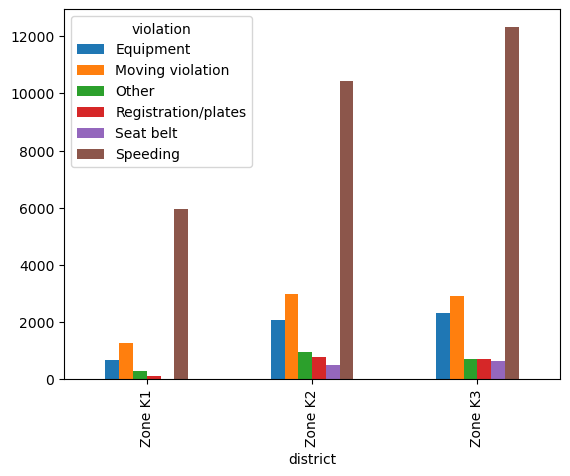

In [44]:
# Display the Categorical Counts w/Bar Plot
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

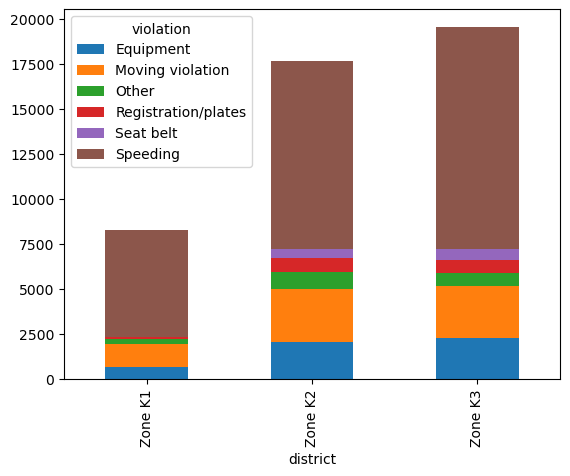

In [45]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

<br>

#### Using Map Method for Value Declaration (Generally New Column)
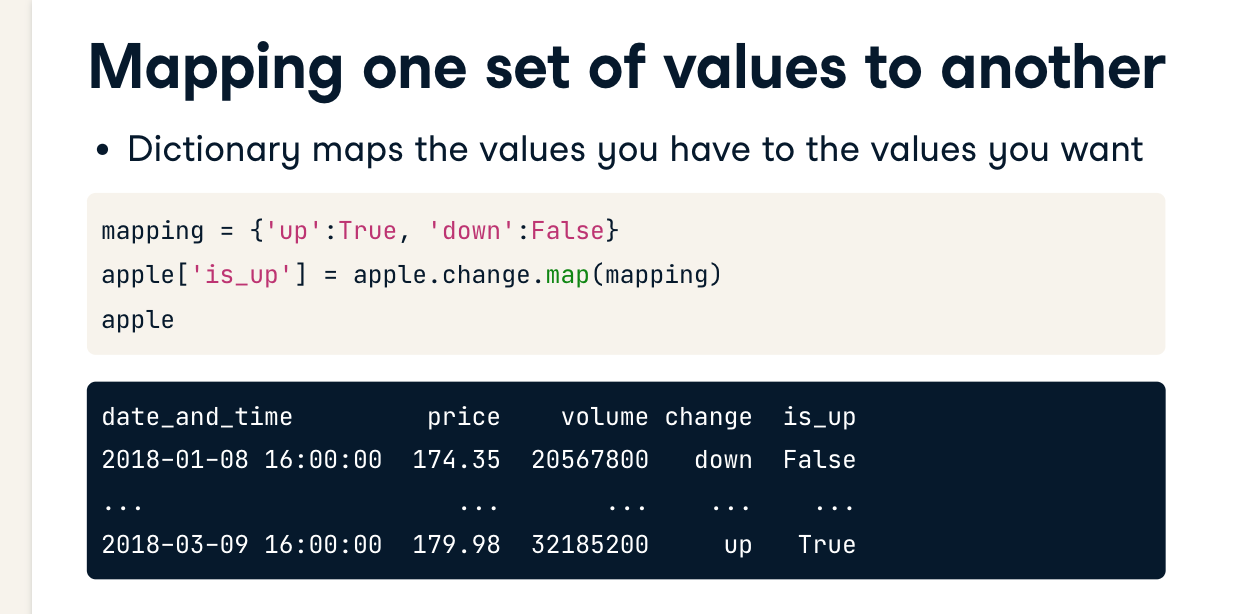

<br>

#### Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

* Convert '0-15 Min' to 8
* Convert '16-30 Min' to 23
* Convert '30+ Min' to 45

In [46]:
ri['stop_duration'].value_counts()

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64

In [48]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.value_counts(), ri['stop_duration'].unique(), '\n')

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].value_counts(), ri['stop_minutes'].unique())

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64 ['0-15 Min' '16-30 Min' '30+ Min'] 

8     69577
23    13740
45     3219
Name: stop_minutes, dtype: int64 [ 8 23 45]


['Equipment/Inspection Violation' 'Speeding' 'Call for Service'
 'Other Traffic Violation' 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Motorist Assist/Courtesy'
 'Suspicious Person' 'Violation of City/Town Ordinance' 'Warrant'
 'Seatbelt Violation']
violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


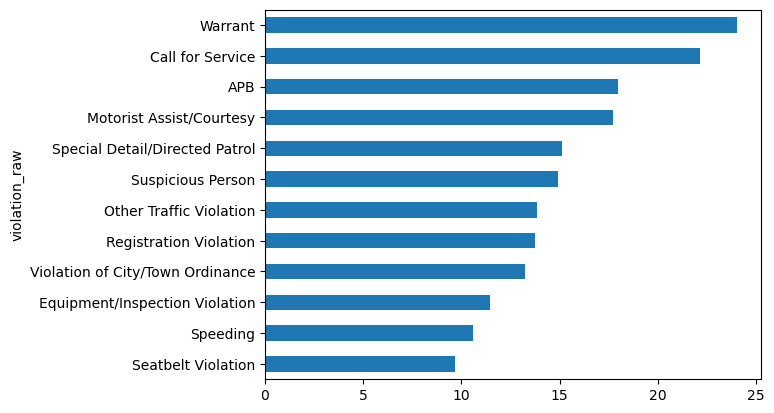

In [51]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.violation_raw.unique())
print(ri.groupby('violation_raw')['stop_minutes'].mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# # Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()